<a href="https://colab.research.google.com/github/S-Subhashree/Machine-learning/blob/main/MLfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
# Importing necessary libraries
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

Load the Dataset

In [ ]:
url = '/content/drive/MyDrive/Share Rotten_Tomatoes_Movies3.csv'

# Loading the dataset
data = pd.read_csv(url, encoding='ISO-8859-1')

# Displaying the first few rows of the dataset
data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0


Data Exploration and Preprocessing

In [ ]:
# Check for missing values
data.isnull().sum()

# Drop rows or fill missing values based on the problem
data = data.dropna()

# Checking the columns and their data types
data.info()

# Descriptive statistics of the numerical columns
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7610 entries, 0 to 16634
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         7610 non-null   object 
 1   movie_info          7610 non-null   object 
 2   critics_consensus   7610 non-null   object 
 3   rating              7610 non-null   object 
 4   genre               7610 non-null   object 
 5   directors           7610 non-null   object 
 6   writers             7610 non-null   object 
 7   cast                7610 non-null   object 
 8   in_theaters_date    7610 non-null   object 
 9   on_streaming_date   7610 non-null   object 
 10  runtime_in_minutes  7610 non-null   float64
 11  studio_name         7610 non-null   object 
 12  tomatometer_status  7610 non-null   object 
 13  tomatometer_rating  7610 non-null   int64  
 14  tomatometer_count   7610 non-null   int64  
 15  audience_rating     7610 non-null   float64
dtypes: float64

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,7610.000000,7610.000000,7610.000000,7610.000000
mean,106.319974,61.312352,101.143101,62.987385
std,19.560031,27.638312,72.922055,19.546161
min,1.000000,0.000000,5.000000,6.000000
25%,94.000000,39.000000,44.000000,48.000000
50%,103.000000,67.000000,80.000000,65.000000
75%,116.000000,86.000000,141.000000,79.000000
max,333.000000,100.000000,497.000000,100.000000


In [ ]:
data = pd.get_dummies(data, drop_first=True)
# drop_first avoids multicollinearity

Feature Selection

In [ ]:
# Assuming the target variable is 'audience_rating'

# Independent variables
X = data.drop('audience_rating', axis=1)

# Dependent variable (target)
y = data['audience_rating']

Train-Test Split

In [ ]:
# 70-80% for training and the remaining for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building a Model using pipeline

In [ ]:
# Create a pipeline
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Train the model using the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Make Predictions

In [ ]:
y_pred = pipeline.predict(X_test)

Evaluate the model's performance using accuracy metrics

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 13.829109616231621
Mean Squared Error: 271.8700436275892
R-squared: 0.28531754331724857


 Improve the Model with different models

In [ ]:
# Trying another model Random Forest
from sklearn.ensemble import RandomForestRegressor

pipeline = make_pipeline(StandardScaler(), RandomForestRegressor())
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the new model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

MAE: 10.189415243101184, MSE: 170.9062405387648, R2: 0.5507276556810667


Visualize Results

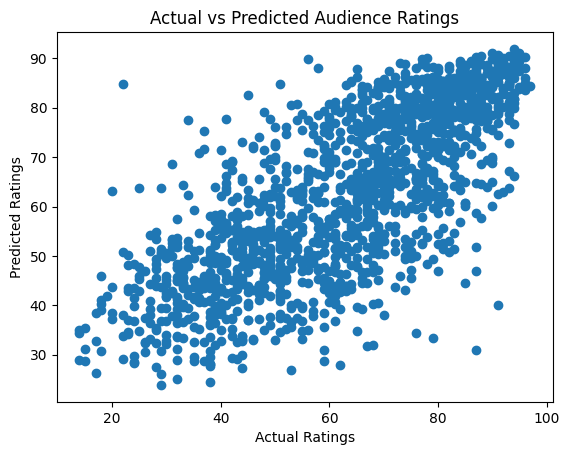

In [ ]:
# plotting the actual vs predicted values.
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Audience Ratings')
plt.show()